In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Visualization. Exploratory Data Analysis
## Live Demos

In [3]:
flags_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", header = None)

In [4]:
flags_data.columns = ["name", "landmass", "zone", "area", "population", "language", "religion", "bars", "stripes", "colours", "red", "green", "blue", "gold", "white", "black", "orange", "mainhue", "circles", "crosses", "saltires", "quarters", "sunstars", "crescent", "triangle", "icon", "animate", "text", "topleft", "botright"]

In [5]:
flags_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [6]:
flags_data.shape

(194, 30)

In [7]:
flags_data.columns

Index(['name', 'landmass', 'zone', 'area', 'population', 'language',
       'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
       'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
       'animate', 'text', 'topleft', 'botright'],
      dtype='object')

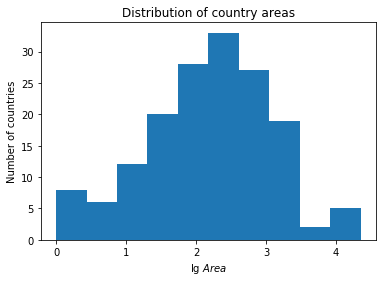

In [8]:
plt.hist(np.log10(flags_data.area[flags_data.area > 0]))

plt.title("Distribution of country areas")
plt.xlabel("$\lg\ {Area}$")
plt.ylabel("Number of countries")

plt.show()

In [9]:
flags_data[flags_data.area > 15000]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
184,USSR,5,1,22402,274,5,6,0,0,2,...,0,0,1,0,0,1,0,0,red,red


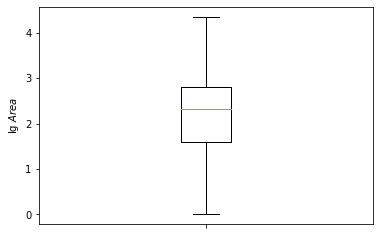

In [10]:
plt.boxplot(np.log10(flags_data.area[flags_data.area > 0]))

plt.xticks([1], [""])
plt.ylabel("$\lg\ Area$")

plt.show()

In [11]:
landmasses = []
mean_areas = []
for landmass, group_data in flags_data.groupby("landmass"):
    landmasses.append(landmass)
    mean_areas.append(group_data.area.mean())
    print(landmass, "=>", group_data.area.mean())

1 => 779.4516129032259
2 => 1211.1176470588234
3 => 139.5142857142857
4 => 534.3076923076923
5 => 1222.8974358974358
6 => 534.85


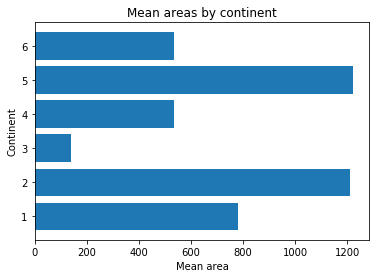

In [12]:
plt.barh(landmasses, mean_areas)

plt.title("Mean areas by continent")
plt.xlabel("Mean area")
plt.ylabel("Continent")

plt.show()

Text(0, 0.5, 'Population [millions]')

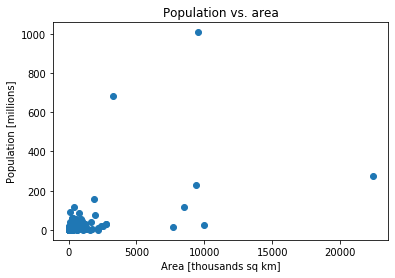

In [13]:
plt.scatter(flags_data.area, flags_data.population)

plt.title("Population vs. area")
plt.xlabel("Area [thousands sq km]")
plt.ylabel("Population [millions]")

In [14]:
smaller_countries = flags_data[(flags_data.area < 5000) & (flags_data.population < 200)]

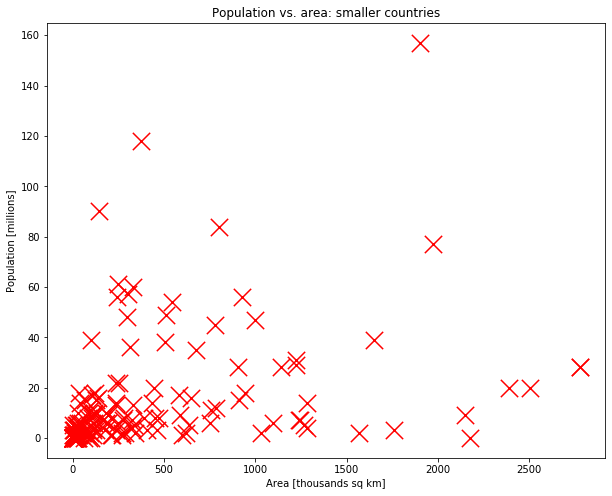

In [27]:
plt.figure(figsize = (10, 8))

plt.scatter(smaller_countries.area, smaller_countries.population, marker = "x", c = "r", s = 300)

plt.title("Population vs. area: smaller countries")
plt.xlabel("Area [thousands sq km]")
plt.ylabel("Population [millions]")

plt.show()

Text(0, 0.5, 'Population [millions]')

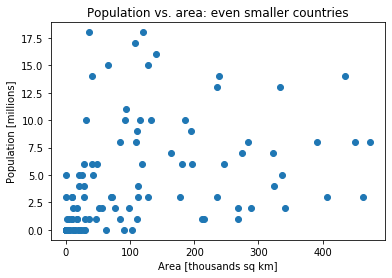

In [16]:
even_smaller_countries = flags_data[(flags_data.area < 500) & (flags_data.population < 20)]
plt.scatter(even_smaller_countries.area, even_smaller_countries.population)

plt.title("Population vs. area: even smaller countries")
plt.xlabel("Area [thousands sq km]")
plt.ylabel("Population [millions]")

C:\Users\Yordan\Anaconda3\envs\tf2\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


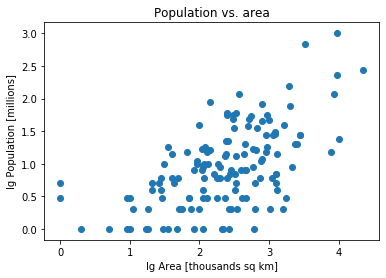

In [17]:
plt.scatter(np.log10(flags_data.area), np.log10(flags_data.population))

plt.title("Population vs. area")
plt.xlabel("lg Area [thousands sq km]")
plt.ylabel("lg Population [millions]")

plt.show()

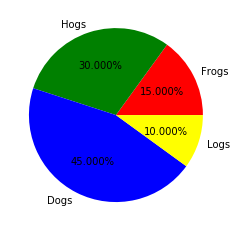

In [35]:
sizes = [15, 30, 45, 10]
plt.pie(sizes, labels = ["Frogs", "Hogs", "Dogs", "Logs"], autopct = '%1.3f%%', colors = ["red", "green", "blue", "yellow"])
# Make the plot look circular
plt.gca().set_aspect("equal")

In [19]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

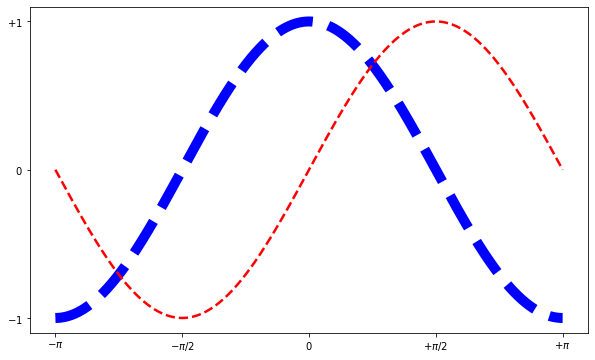

In [43]:
x = np.linspace(-np.pi, np.pi, 5000)

cos_x = np.cos(x) # [-pi; pi]
sin_x = np.sin(x)

plt.figure(figsize = (10, 6))
plt.plot(x, cos_x, color = "blue", linewidth = 10, linestyle = "dashed")
plt.plot(x, sin_x, color = "red", linewidth = 2.5, linestyle = "--")
# Tick marks and labels
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi],
    [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$+\pi/2$", r"$+\pi$"])
plt.yticks([-1, 0, 1], [r"$-1$", r"$0$", r"$+1$"])
# ax = plt.gca()
# for label in ax.get_xticklabels() + ax.get_yticklabels():
#     label.set_fontsize(16)
#     label.set_bbox({facecolor: "white", edgecolor: "None", alpha: 0.65})
plt.show()